In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset into python environment

In [2]:
df=pd.read_csv(r"D:\data science\case study6\titanic_dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# 2. Make ‘PassengerId’ as the index column

In [4]:
df.set_index('PassengerId',inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [5]:
df.shape

(891, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [9]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# 4. Fill in all the missing values present in all the columns in the dataset

Missing values are in Age,Cabin and Embarked

In [11]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[0])
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


# 5. Check and handle outliers in at least 3 columns in the dataset

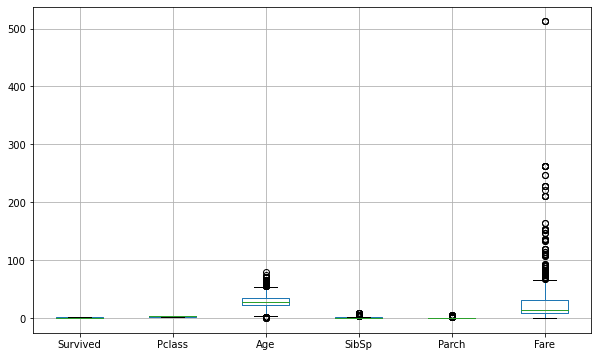

In [12]:
plt.figure(figsize=(10,6))
df.boxplot()
plt.show()

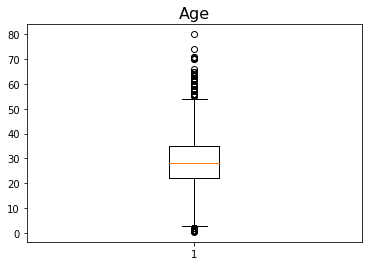

In [13]:
#Removing outlier in 'Age' column
plt.figure()
plt.boxplot(df['Age'])
plt.title("Age",fontsize=16)
plt.show()

In [14]:
Q1=np.percentile(df['Age'],25,interpolation='midpoint')
Q2=np.percentile(df['Age'],50,interpolation='midpoint')
Q3=np.percentile(df['Age'],75,interpolation='midpoint')
print('Q1 = ',Q1,'\nQ2 = ',Q2,'\nQ3 = ',Q3)
IQR=Q3-Q1
print('IQR = ',IQR)

Q1 =  22.0 
Q2 =  28.0 
Q3 =  35.0
IQR =  13.0


In [15]:
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
print('Upper limit = ',up_lim,'\nLower limit = ',low_lim)

Upper limit =  54.5 
Lower limit =  2.5


In [16]:
outlier=[]
for x in df['Age']:
    if (x>up_lim or x<low_lim):
        outlier.append(x)
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [17]:
df.loc[(df['Age']>up_lim ) | (df['Age']<low_lim)].index

Int64Index([  8,  12,  16,  17,  34,  55,  79,  95,  97, 117, 120, 153, 165,
            171, 173, 175, 184, 196, 206, 233, 253, 269, 276, 281, 298, 306,
            327, 341, 367, 382, 387, 439, 457, 468, 470, 480, 484, 488, 493,
            494, 531, 546, 556, 571, 588, 626, 627, 631, 643, 645, 648, 660,
            673, 685, 695, 746, 756, 773, 789, 804, 825, 828, 830, 832, 852,
            880],
           dtype='int64', name='PassengerId')

In [18]:
df.drop([ 8,  12,  16,  17,  34,  55,  79,  95,  97, 117, 120, 153, 165,
            171, 173, 175, 184, 196, 206, 233, 253, 269, 276, 281, 298, 306,
            327, 341, 367, 382, 387, 439, 457, 468, 470, 480, 484, 488, 493,
            494, 531, 546, 556, 571, 588, 626, 627, 631, 643, 645, 648, 660,
            673, 685, 695, 746, 756, 773, 789, 804, 825, 828, 830, 832, 852,
            880],inplace=True)

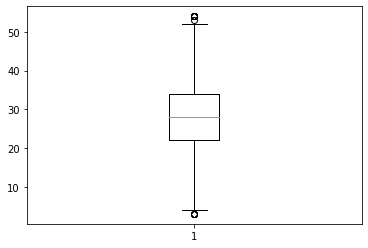

In [19]:
plt.boxplot(df['Age'])
plt.show()

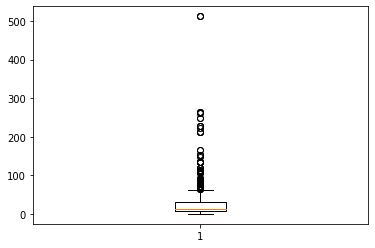

In [20]:
#Removing outlier in 'Fare' column
plt.boxplot(df['Fare'])
plt.show()

In [21]:
Q1=np.percentile(df['Fare'],25,interpolation='midpoint')
Q2=np.percentile(df['Fare'],50,interpolation='midpoint')
Q3=np.percentile(df['Fare'],75,interpolation='midpoint')
print('Q1 = ',Q1,'\nQ2 = ',round(Q2,2),'\nQ3 = ',Q3)
IQR=Q3-Q1
print('IQR = ',IQR)

Q1 =  7.8958 
Q2 =  13.42 
Q3 =  30.0708
IQR =  22.174999999999997


In [22]:
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
print('Upper limit = ',up_lim,'\nLower limit = ',round(low_lim,2))

Upper limit =  63.333299999999994 
Lower limit =  -25.37


In [23]:
outliers = df.loc[(df['Fare']>up_lim) | (df['Fare']<low_lim)].index
outliers

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89,  98,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
           dtype='int64', name='PassengerId', length=107)

In [24]:
df.drop(outliers,inplace=True)

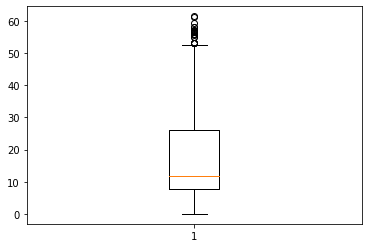

In [25]:
plt.boxplot(df['Fare'])
plt.show()

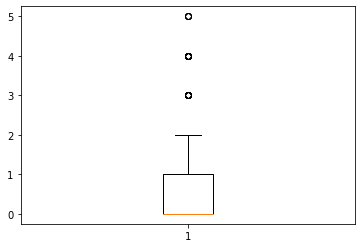

In [26]:
#Removing outlier in SibSp column
plt.boxplot(df['SibSp'])
plt.show()

In [27]:
Q1=np.percentile(df['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(df['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(df['SibSp'],75,interpolation='midpoint')
print('Q1 = ',Q1,'\nQ2 = ',round(Q2,2),'\nQ3 = ',Q3)
IQR=Q3-Q1
print('IQR = ',IQR)

Q1 =  0.0 
Q2 =  0.0 
Q3 =  1.0
IQR =  1.0


In [28]:
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
print('Upper limit = ',up_lim,'\nLower limit = ',low_lim)

Upper limit =  2.5 
Lower limit =  -1.5


In [29]:
outlier = []
for x in df['SibSp']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier

[3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 3,
 5,
 3,
 4,
 4,
 3,
 5,
 4,
 3,
 4,
 4,
 3,
 4]

In [30]:
ind1=df['SibSp']>up_lim
df.loc[ind1].index

Int64Index([ 25,  51,  60,  64,  69,  72,  86, 172, 177, 183, 230, 234, 262,
            267, 279, 375, 410, 481, 486, 542, 543, 635, 684, 687, 727, 788,
            814, 820, 851],
           dtype='int64', name='PassengerId')

In [31]:
df.drop([ 25,  51,  60,  64,  69,  72,  86, 172, 177, 183, 230, 234, 262,
            267, 279, 375, 410, 481, 486, 542, 543, 635, 684, 687, 727, 788,
            814, 820, 851],inplace=True)

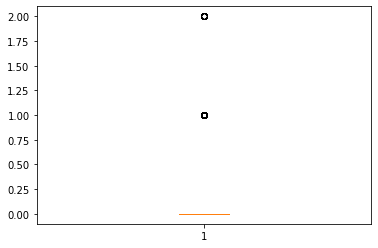

In [32]:
plt.boxplot(df['SibSp'])
plt.show()

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Sex = le.fit_transform(df.Sex)
X = df.drop(columns=['Survived','Name','Ticket'])
X = pd.get_dummies(X)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_A10,Cabin_A14,Cabin_A16,Cabin_A19,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,1,22.0,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,0,26.0,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,35.0,1,0,53.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,3,1,35.0,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,3,1,28.0,0,0,8.4583,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [34]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

X = min_max_scaler.fit_transform(X)
X = pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
count,689.000000,689.000000,689.000000,689.00000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,...,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,0.746734,0.687954,0.504141,0.13643,0.044993,0.270959,0.001451,0.001451,0.001451,0.001451,...,0.002903,0.002903,0.004354,0.001451,0.001451,0.004354,0.001451,0.150943,0.098694,0.750363
std,0.361793,0.463665,0.187161,0.25051,0.125771,0.213306,0.038097,0.038097,0.038097,0.038097,...,0.053838,0.053838,0.065890,0.038097,0.038097,0.065890,0.038097,0.358254,0.298467,0.433117
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.392157,0.00000,0.000000,0.127962,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,0.490196,0.00000,0.000000,0.171068,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.588235,0.00000,0.000000,0.382051,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
